# 통계적 회귀

> 회귀 모델을 통계적 관점에서 평가해 본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### --▶ ecommers dataset

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/5aa8e40a-c6a8-4463-a0f6-c105c4ad8226" width="67%" height="67%"></br>

- 사용자 세션 길이는 ‘한 번 접속했을 때 평균 어느 정도의 시간을 사용하는지에 대한 데이터'

- Time on App : 폰 앱으로 접속했을 때 유지 시간 (분)

- Time on Website : 웹사이트로 접속했을 때 유지 시간 (분)

- Length of Membership : 회원 자격 유지 기간 (연)

In [10]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
df = pd.read_csv(data_url, sep = ',') #, encoding='utf-8')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### --▶ 필요 없는 컬럼 삭제

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df.drop(['Email', 'Address', 'Avatar'], axis = 1, inplace=True)
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


</br>

#### --▶ 컬럼별 boxplot

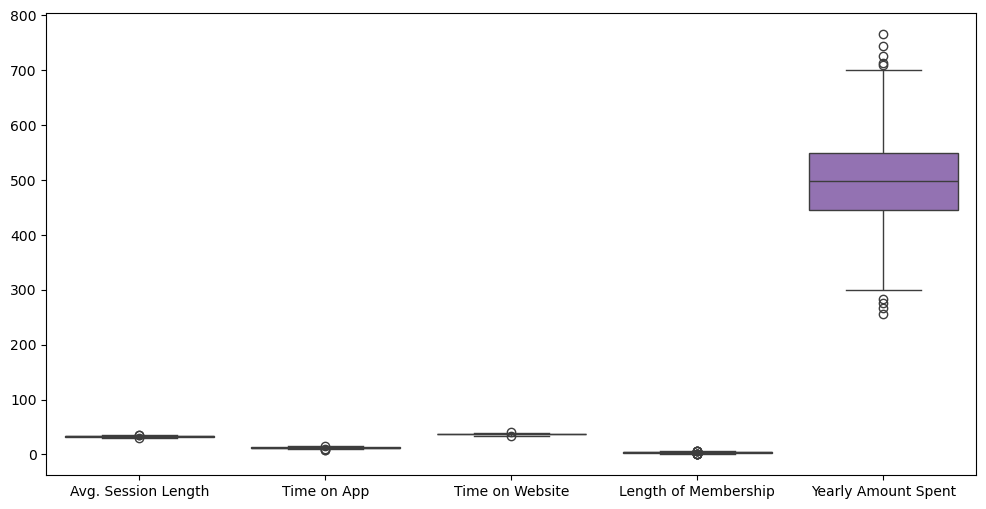

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df);

#### --▶ features boxplot

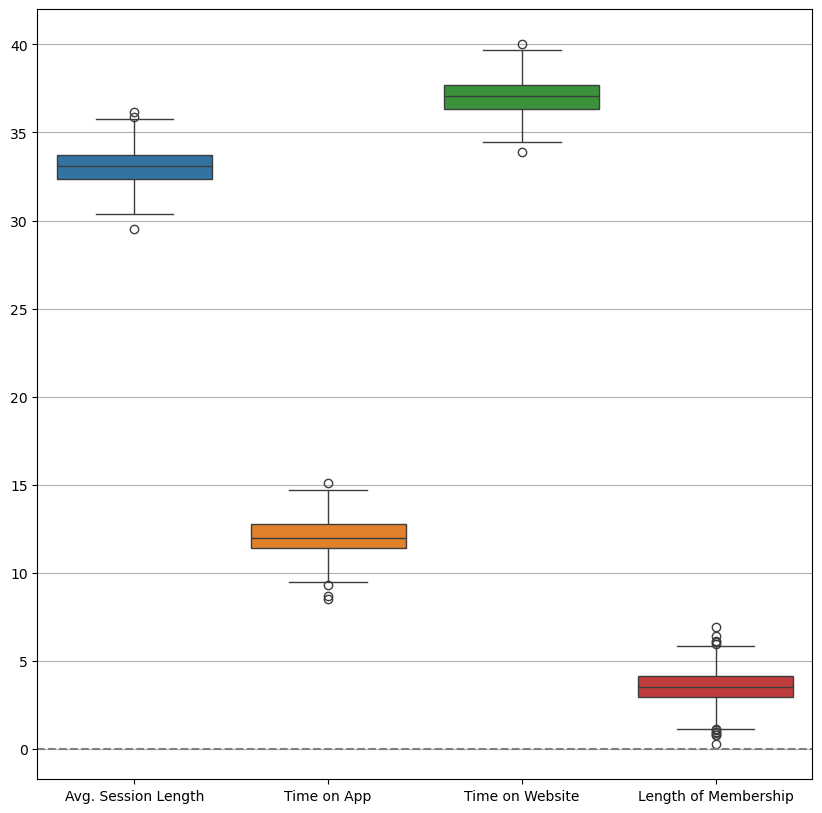

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:, :-1]);
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(axis='y')
plt.show()

#### --▶ target boxplot

- Label 값에 대한 boxplot

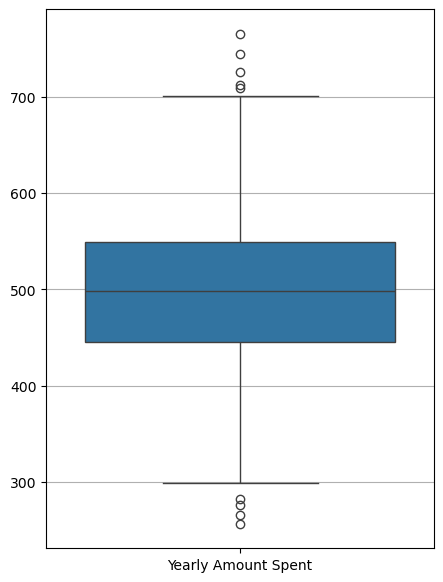

In [24]:
plt.figure(figsize=(5,7))
sns.boxplot(data=df.iloc[:, -1:]); #.set_xlabel('Yearly Amount Spent');
plt.grid(axis='y')
plt.show()

</br>

#### --▶ pairplot으로 경향 확인

<Figure size 1200x1200 with 0 Axes>

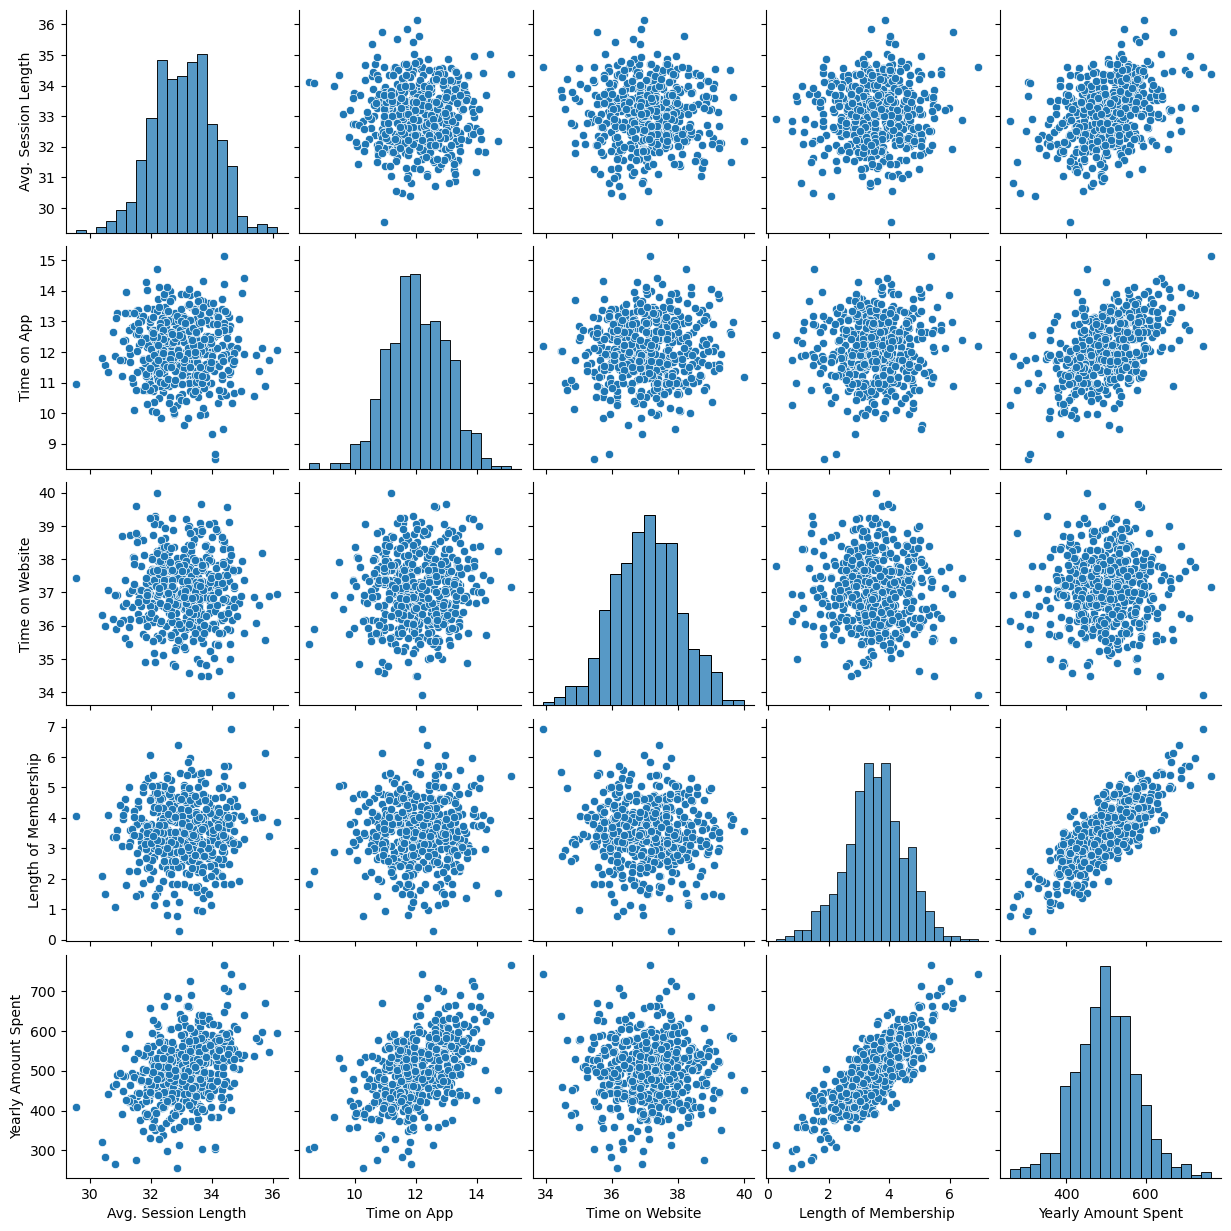

In [29]:
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

plt.figure(figsize=(12,12))
sns.pairplot(df);

👉 큰 상관관계를 보이는 것은 멤버쉽 유지 기간이다.

- Length of Membership과 Yearly Amount Spent의 상관관계가 가장 커보인다.

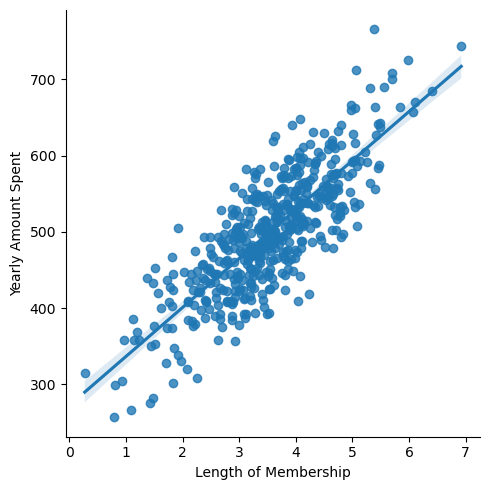

In [30]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent');

<br></br>

## 🔰 OLS 통계적 회귀

- OLS(선형최소제곱법)을 활용해 단순선형회귀 모델을 구현한다.

In [32]:
import statsmodels.api as sm

X = df['Length of Membership']
y = df['Yearly Amount Spent']

lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):                        0.00
Time:                         03:32:51   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 __수치의 의미__

- R-squared : 모형 적합도, y의 분산을 각각의 변수들이 약 99.8%로 설명할 수 있음

- Adj. R-squared : 독립변수가 여러 개인 다중회귀분석에서는 R-squared를 사용하지 안고, 수정결정계수를 사용한다.

- Prob. F-Statistic : 회귀모형에 대한 통계적 유의미성 검정. 이 값이 0.05 이하라면 모집단에서도 의미가 있다고 볼 수 있다.

</br>

Notes: [1] R² is computed without centering (uncentered) since the model does not contain a constant.

👉 데이터를 컬럼 형태로 전달해서 상수항이 없다고 나온다.

- 이 상수항은 $~A=\begin{bmatrix} \; x_1 \; & \; 1 \; \\ \vdots & \vdots \\ x_n & 1 \end{bmatrix}~$에서 $\begin{bmatrix} \; 1 \; \\ \vdots \\ 1 \end{bmatrix}$을 의미한다.

- Sample 예제에서 사용했던 코드에서는 상수항까지 포함된 의미의 'y ~ x'를 사용했었다.

	> import statsmodels.formula.api as smf
	>
	> lm_model = smf.ols(formula='y ~ x', data=df).fit() --> formula='y ~ x'는 "y = ax + b"라는 의미를 내포하고 있다.

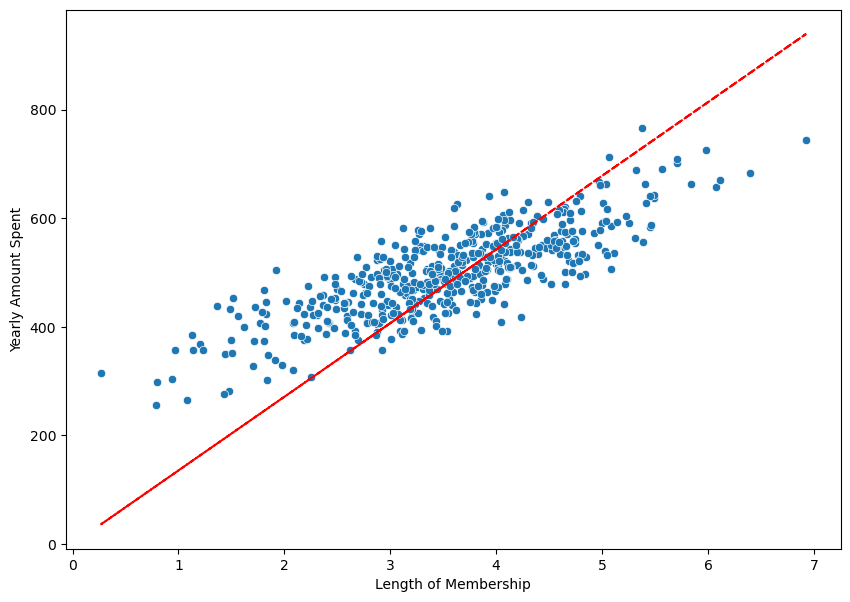

In [36]:
pred = lm.predict(X)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X, y=y)
plt.plot(X, pred, ls='dashed', color='red')
plt.show()

👉 상수항이 없는 회귀 모델

- 추정된 회귀식에 상수항이 없어서 그래프가 참값의 경향을 제대로 표현하지 못하고 있다.

- 참값의 최대 최소 값을 직선으로 그려서 비교해 본다.

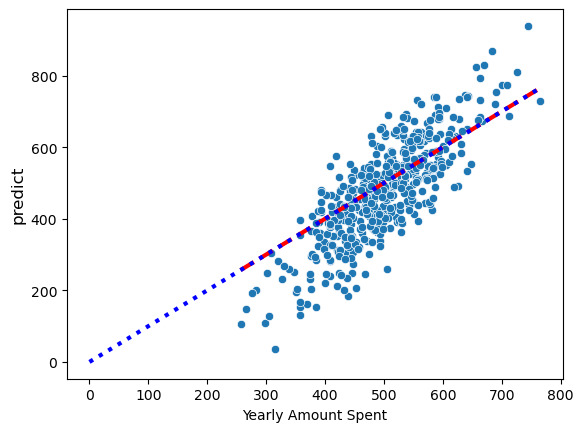

In [42]:
sns.scatterplot(x=y, y=pred); #--> 참 값 vs. 예측 값 

plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='--', lw=3);
plt.plot([0, max(y)], [0, max(y)], 'b', ls=':', lw=3);
plt.ylabel('predict', fontsize=12)
plt.show()

#### 🎫 __상수항 추가 후 다시 모델 fit__

In [46]:
[1] * 5

[1, 1, 1, 1, 1]

In [43]:
X = np.c_[X, [1]*len(X)] #--> numpy로 컬럼[c_] 추가, 행[r_] 추가도 가능
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [44]:
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):          4.81e-117
Time:                         05:11:37   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 AIC

- 만들어진 모델이 주어진 데이터를 얼마나 잘 반영하는지에 대한 지표이다.

- 모델이 원래의 정보를 얼마나 손실시키느냐를 나타내는 수치이다.

- 그러므로 AIC 수치는 낮을수록 좋다.

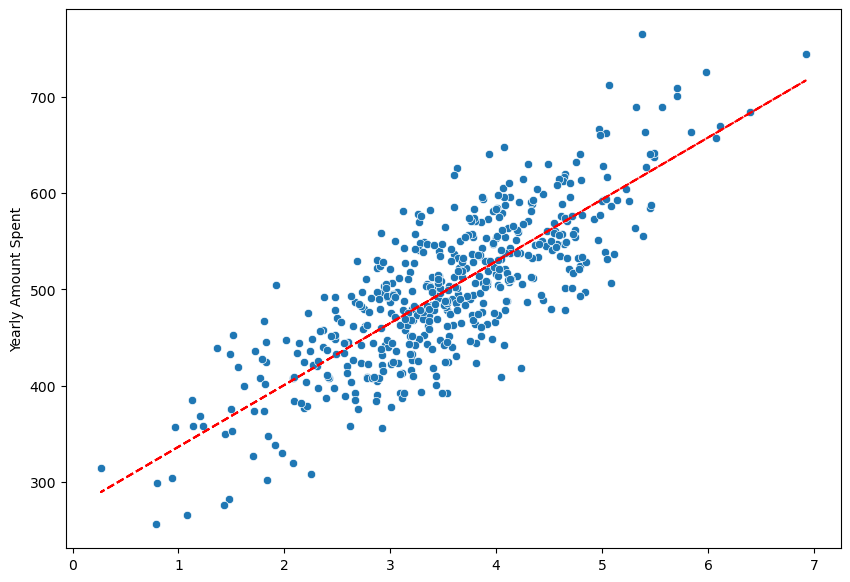

In [45]:
pred = lm.predict(X)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X[:, 0], y=y)
plt.plot(X[:, 0], pred, ls='dashed', color='red')
plt.show()

#### --▶ 참 값 $~vs.\,$ 예측 값

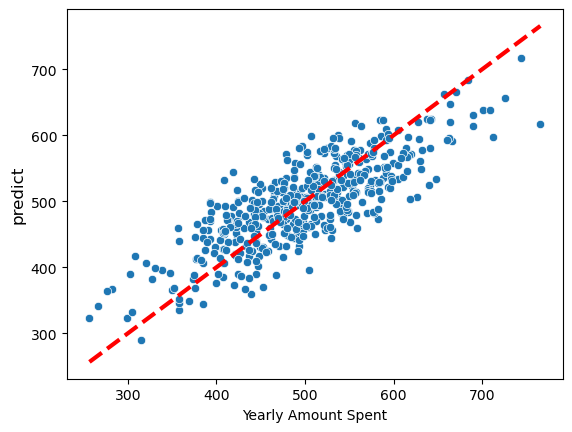

In [47]:
sns.scatterplot(x=y, y=pred); #--> 참 값 vs. 예측 값 

plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='--', lw=3);
plt.ylabel('predict', fontsize=12)
plt.show()

#### 🎫 __데이터 분할 후 다시 모델 fit__

- 학습용 데이터와 테스트용 데이터를 나눈 후 선형회귀 모델을 다시 만들어 본다.

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Yearly Amount Spent')
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### --▶ 4개의 컬럼 모두를 변수로 보고 회귀

In [50]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):                        0.00
Time:                         05:47:41   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### --▶ 참 값 $~vs.\,$ 예측 값

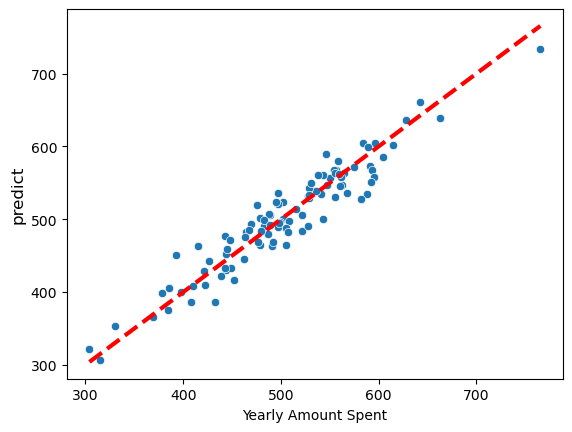

In [51]:
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred); #--> 참 값 vs. 예측 값 

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=3);
plt.ylabel('predict', fontsize=12)
plt.show()

👉 직선에 모여 있을 수록 좋은 모델이다.

<br></br>

## 🔰 SciKit Learn 회귀

- scikit learn을 통해 Split된 데이터로 선형회귀 모델 구현

In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.982842913353648

In [53]:
lr.coef_ #--> coefficient 회귀계수

array([25.58906205, 38.66403509,  0.43128194, 61.82279366])

In [54]:
lr.intercept_ #--> y절편

-1046.862895797596

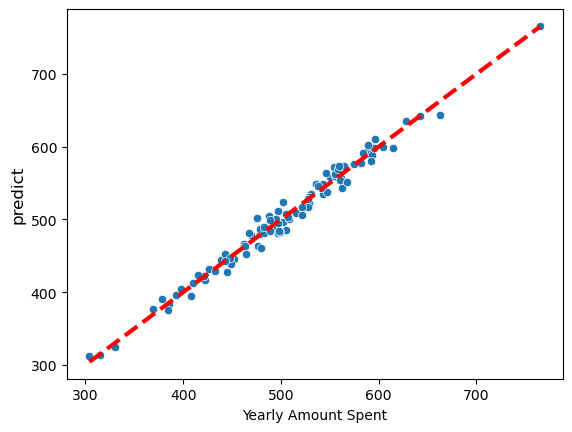

In [55]:
pred = lr.predict(X_test)

sns.scatterplot(x=y_test, y=pred); #--> 참 값 vs. 예측 값 

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=3);
plt.ylabel('predict', fontsize=12)
plt.show()